In [ ]:
import pandas as pd

data = pd.read_csv('/kaggle/input/twitter-airline-sentiment/Tweets.csv') # Load the dataset

data.head() # Display the first few rows

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


my

In [ ]:
data.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 90.1 MB/s eta 0:00:00:00:01:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy
from nltk.corpus import stopwords
import string
from tqdm import tqdm
import pandas as pd

# tqdm integration with pandas
tqdm.pandas()

# Load spaCy model
nlp = spacy.load('en_core_web_sm')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if token.text not in stop_words]
    return ' '.join(tokens)

# Apply preprocessing with progress bar
data['cleaned_text'] = data['text'].progress_apply(preprocess_text)


100%|██████████| 14640/14640 [01:35<00:00, 153.04it/s]


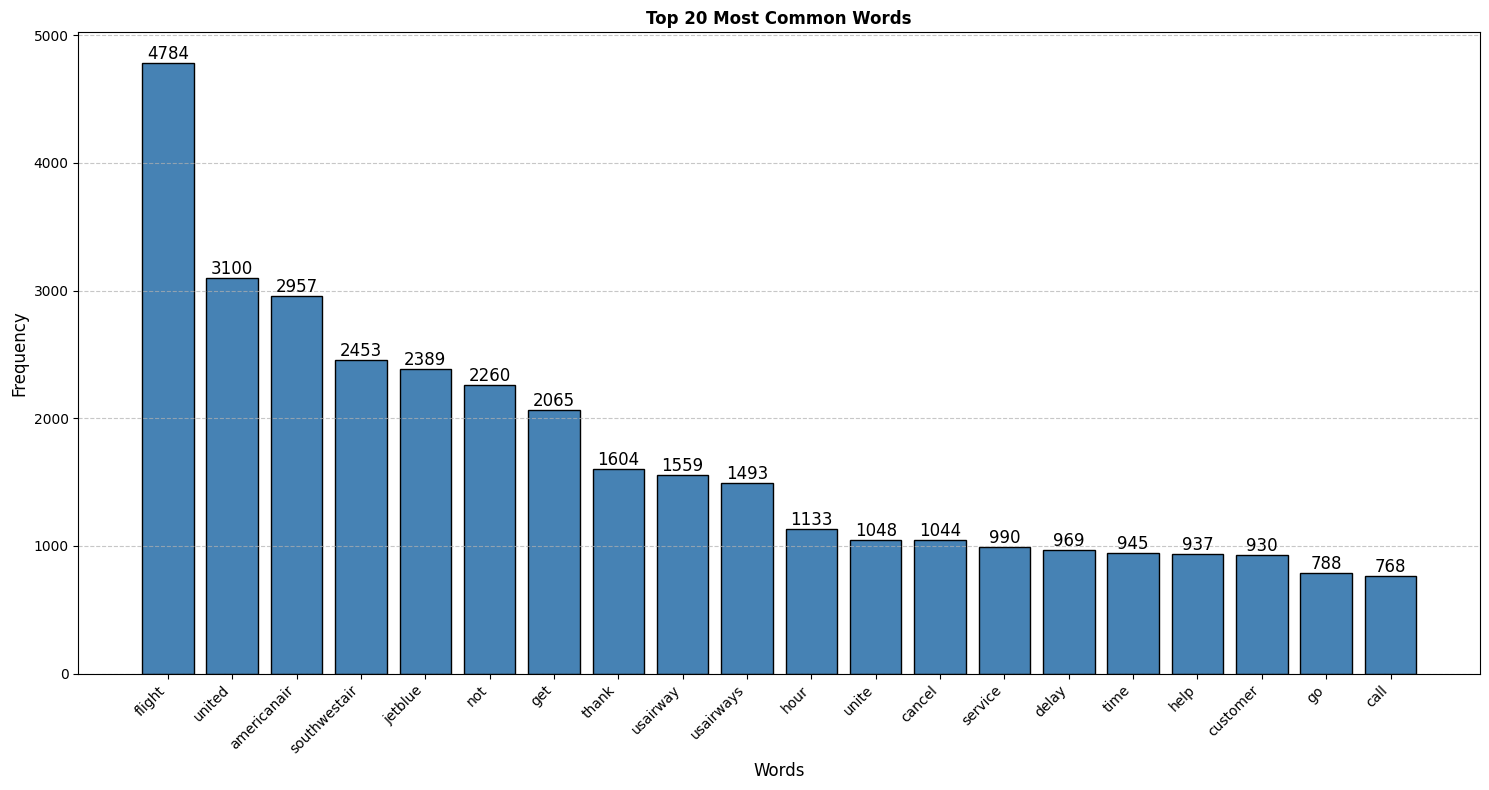

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example of a word frequency plot
from collections import Counter

all_words = ' '.join(data['cleaned_text']).split()
word_freq = Counter(all_words)
common_words = word_freq.most_common(20)

words = [word[0] for word in common_words]
counts = [word[1] for word in common_words]

plt.figure(figsize=(15, 8))
bars = plt.bar(words, counts, color='steelblue', edgecolor='black')

plt.title('Top 20 Most Common Words', fontsize=12, fontweight='bold')
plt.xlabel('Words', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom', fontsize=12)

plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Map labels to integers
label_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
data['label'] = data['airline_sentiment'].map(label_mapping)

In [ ]:
from transformers import BertTokenizer

# Tokenization
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the data
def tokenize_function(text):
    return tokenizer(text, padding='max_length', truncation=True, max_length=128)

data['tokenized'] = data['cleaned_text'].apply(tokenize_function)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
import torch

class SentimentDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.encodings['input_ids'])

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item


In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset
train_texts, temp_texts, train_labels, temp_labels = train_test_split(data['tokenized'].to_list(), data['label'].to_list(), test_size=0.3, random_state=42)
val_texts, test_texts, val_labels, test_labels = train_test_split(temp_texts, temp_labels, test_size=0.5, random_state=42)

In [ ]:
def convert_to_dicts(tokenized_texts):
    input_ids = [d['input_ids'] for d in tokenized_texts]
    attention_masks = [d['attention_mask'] for d in tokenized_texts]
    return {'input_ids': input_ids, 'attention_mask': attention_masks}

# Convert to lists of dictionaries
train_encodings = convert_to_dicts(train_texts)
val_encodings = convert_to_dicts(val_texts)
test_encodings = convert_to_dicts(test_texts)

# Create three dataset objects using the SentimentDataset
train_dataset = SentimentDataset(train_encodings, train_labels)
val_dataset = SentimentDataset(val_encodings, val_labels)
test_dataset = SentimentDataset(test_encodings, test_labels)

In [ ]:
from transformers import BertForSequenceClassification, Trainer, TrainingArguments

model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
import os
from transformers import logging

os.environ["TRANSFORMERS_NO_TQDM"] = "false"
logging.set_verbosity_info()


In [ ]:
print("Train samples:", len(train_dataset))
print("Val samples:", len(val_dataset))


Train samples: 10248
Val samples: 2196


In [ ]:
print(model)               # Should print model architecture
print(len(train_dataset))  # Should print a positive number


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [ ]:
from tqdm.auto import tqdm
tqdm.pandas()  # Optional: if you're using .progress_apply()


In [ ]:
import torch
print("CUDA available:", torch.cuda.is_available())
print("Device:", torch.device("cuda" if torch.cuda.is_available() else "cpu"))


CUDA available: True
Device: cuda


In [ ]:
model = model.to("cuda")


In [ ]:
import gc
import torch
gc.collect()
torch.cuda.empty_cache()


In [ ]:
!rm -rf ./*


In [ ]:
import torch, gc
gc.collect()
torch.cuda.empty_cache()


In [ ]:
from transformers import TrainingArguments, Trainer
from tqdm.auto import tqdm
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report
import numpy as np

# Optional: progress bar for pandas
tqdm.pandas()

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=5,
    per_device_eval_batch_size=5,
    warmup_steps=10,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=300,
    save_steps=1500,
    fp16=True,
    report_to="none",
    disable_tqdm=False
)

# Define metrics function
def compute_metrics(pred):
    labels = pred.label_ids
    preds = np.argmax(pred.predictions, axis=1)
    
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)
    
    return {
        'accuracy': acc,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics
)

# Train the model
trainer.train()

# Evaluate on test set
results = trainer.evaluate(test_dataset)

# Print basic metrics
print("Evaluation Results:")
print(f"  - Loss: {results['eval_loss']:.4f}")
print(f"  - Accuracy: {results['eval_accuracy']:.4f}")
print(f"  - Precision: {results['eval_precision']:.4f}")
print(f"  - Recall: {results['eval_recall']:.4f}")
print(f"  - F1 Score: {results['eval_f1']:.4f}")
print(f"  - Runtime: {results['eval_runtime']:.2f} seconds")
print(f"  - Samples per Second: {results['eval_samples_per_second']:.2f}")
print(f"  - Steps per Second: {results['eval_steps_per_second']:.2f}")
print(f"  - Epoch: {results['epoch']:.4f}")

# Print full classification report
predictions = trainer.predict(test_dataset)
y_true = predictions.label_ids
y_pred = np.argmax(predictions.predictions, axis=1)

print("\nFull Classification Report:")
print(classification_report(y_true, y_pred, digits=4))


PyTorch: setting up devices
Using auto half precision backend
***** Running training *****
  Num examples = 10,248
  Num Epochs = 3
  Instantaneous batch size per device = 5
  Training with DataParallel so batch size has been adjusted to: 10
  Total train batch size (w. parallel, distributed & accumulation) = 10
  Gradient Accumulation steps = 1
  Total optimization steps = 3,075
  Number of trainable parameters = 109,484,547
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss
300,0.619400
600,0.782400
900,0.784300
1200,0.787500
1500,0.813400
1800,0.420400
2100,0.346700
2400,0.424200
2700,0.495300
3000,0.458900


Saving model checkpoint to ./results/checkpoint-1500
Configuration saved in ./results/checkpoint-1500/config.json
Model weights saved in ./results/checkpoint-1500/model.safetensors
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
Saving model checkpoint to ./results/checkpoint-3000
Configuration saved in ./results/checkpoint-3000/config.json
Model weights saved in ./results/checkpoint-3000/model.safetensors
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
Saving model checkpoint to ./results/checkpoint-3075
Configuration saved in ./results/checkpoint-3075/config.json
Model weights saved in ./results/checkpoint-3075/model.safetensors


Train


***** Running Prediction *****
  Num examples = 2196
  Batch size = 10


Evaluation Results:
  - Loss: 2.8090
  - Accuracy: 0.8142
  - Precision: 0.8079
  - Recall: 0.8142
  - F1 Score: 0.8102
  - Runtime: 15.22 seconds
  - Samples per Second: 144.30
  - Steps per Second: 14.46
  - Epoch: 3.0000


/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(



Full Classification Report:
              precision    recall  f1-score   support

           0     0.8641    0.9055    0.8843      1439
           1     0.6294    0.5487    0.5863       421
           2     0.7913    0.7560    0.7732       336

    accuracy                         0.8142      2196
   macro avg     0.7616    0.7367    0.7479      2196
weighted avg     0.8079    0.8142    0.8102      2196



In [ ]:
# Save model
model_save_path = "./bert_model"
trainer.save_model(model_save_path)

# Save tokenizer
tokenizer.save_pretrained(model_save_path)


Saving model checkpoint to ./bert_model
Configuration saved in ./bert_model/config.json
Model weights saved in ./bert_model/model.safetensors
tokenizer config file saved in ./bert_model/tokenizer_config.json
Special tokens file saved in ./bert_model/special_tokens_map.json


('./bert_model/tokenizer_config.json',
 './bert_model/special_tokens_map.json',
 './bert_model/vocab.txt',
 './bert_model/added_tokens.json')

In [ ]:
import shutil

# Create a zip file of the saved model directory
shutil.make_archive("bert_model", 'zip', model_save_path)


'/kaggle/working/bert_model.zip'

In [ ]:
from IPython.display import FileLink

# Display download link
FileLink("bert_model.zip")


/kaggle/working/bert_model.zip

In [ ]:
def predict_sentiment(text):
    '''Predict the sentiment of a given text using the trained BERT model.'''

    # Set model to eval mode
    model.eval()

    # Get device of model
    device = next(model.parameters()).device

    # Tokenize and move to same device
    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=128)
    inputs = {k: v.to(device) for k, v in inputs.items()}

    # Disable gradient calc for inference
    with torch.no_grad():
        outputs = model(**inputs)

    predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
    predicted_class = torch.argmax(predictions, dim=1).item()
    sentiment = {0: 'negative', 1: 'neutral', 2: 'positive'}

    return sentiment[predicted_class]


In [ ]:
example_text = "I love flying with this airline!"
predicted_sentiment = predict_sentiment(example_text)
print(f"Predicted Sentiment: {predicted_sentiment}")


Predicted Sentiment: positive


In [ ]:
example_text = "I love doing ml!"
predicted_sentiment = predict_sentiment(example_text)
print(f"Predicted Sentiment: {predicted_sentiment}")


Predicted Sentiment: positive


In [ ]:
example_text = "I hate laziness"
predicted_sentiment = predict_sentiment(example_text)
print(f"Predicted Sentiment: {predicted_sentiment}")


Predicted Sentiment: negative


In [ ]:
example_text = "who are you"
predicted_sentiment = predict_sentiment(example_text)
print(f"Predicted Sentiment: {predicted_sentiment}")


Predicted Sentiment: neutral


In [ ]:
example_text = "who are you"
predicted_sentiment = predict_sentiment(example_text)
print(f"Predicted Sentiment: {predicted_sentiment}")


In [ ]:
sample_texts = [
    "I absolutely love this product!",
    "The movie was okay, not great but not terrible either.",
    "I'm really disappointed with the service.",
    "What time does the store open tomorrow?",
    "This experience was fantastic and exceeded my expectations!"
]

for text in sample_texts:
    sentiment = predict_sentiment(text)
    print(f"Text: {text}\nPredicted Sentiment: {sentiment}\n")


Text: I absolutely love this product!
Predicted Sentiment: positive

Text: The movie was okay, not great but not terrible either.
Predicted Sentiment: negative

Text: I'm really disappointed with the service.
Predicted Sentiment: negative

Text: What time does the store open tomorrow?
Predicted Sentiment: neutral

Text: This experience was fantastic and exceeded my expectations!
Predicted Sentiment: positive

